You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.


You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

## Description of the data
A database with info on taxi rides in Chicago:

neighborhoods table: data on city neighborhoods
name: name of the neighborhood
neighborhood_id: neighborhood code

cabs table: data on taxis
cab_id: vehicle code
vehicle_id: the vehicle's technical ID
company_name: the company that owns the vehicle

trips table: data on rides
trip_id: ride code
cab_id: code of the vehicle operating the ride
start_ts: date and time of the beginning of the ride (time rounded to the hour)
end_ts: date and time of the end of the ride (time rounded to the hour)
duration_seconds: ride duration in seconds
distance_miles: ride distance in miles
pickup_location_id: pickup neighborhood code
dropoff_location_id: dropoff neighborhood code

weather_records table: data on weather
record_id: weather record code
ts: record date and time (time rounded to the hour)
temperature: temperature when the record was taken
description: brief description of weather conditions, e.g. "light rain" or "scattered clouds"

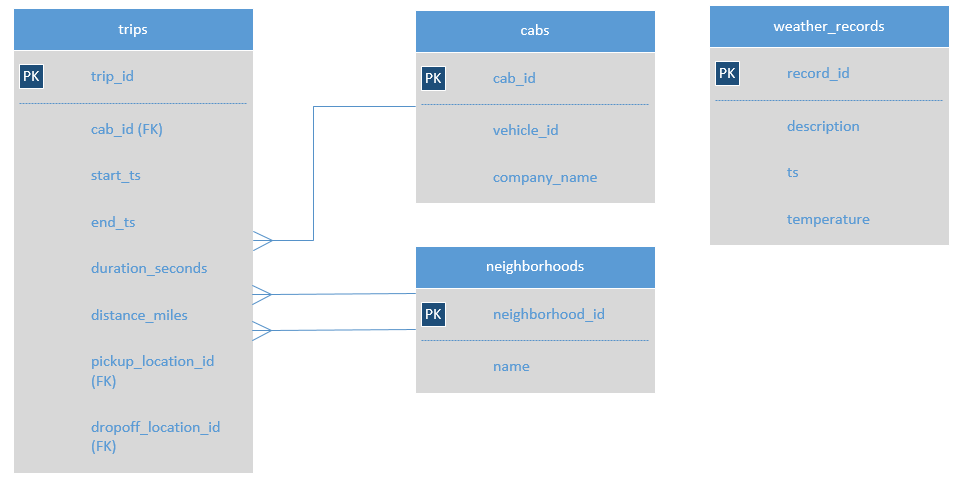

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
from functools import reduce

In [2]:
company = pd.read_csv('/datasets/project_sql_result_01.csv')
trips= pd.read_csv('/datasets/project_sql_result_04.csv')
airport_trip= pd.read_csv('/datasets/project_sql_result_07.csv')


In [3]:
print('Company table Information')
print(company.info())
print()
print('Trip table Information')
print(trips.info())
print()
print('Airport Trip table Information')
print(airport_trip.info())

Company table Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Trip table Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Airport Trip table Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts         

In [4]:
company.head(15)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [7]:
trips.head(15)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [8]:
trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [9]:
trips.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [10]:
airport_trip.head(15)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [11]:
airport_trip.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [12]:
airport_trip.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Company Table contains the companies names and the amount of trips made for each company during 11/15/17-11/16/17. It consists of 64 rows and 2 columns. There are no missing values in the data provided. 

The trips table contains data on the dropoff locations and avg number of tips. It consist of 94 rows and 2 columns. This table also does not contain any missing values. 

Airport Trip table contains data on rides from the Loop to O'Hare International Airport, the weather and the duration of the rides. It consist of 1068 rows and 3 columns. There no missing values in this data.

## Change Data Type

In [13]:
airport_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Column start_ts will be changed to datetime format and duration_seconds to integer to make it more concise.

In [14]:
airport_trip['start_ts']=pd.to_datetime(airport_trip['start_ts'], format='%Y-%m-%d %H:%M:%S')
airport_trip['duration_seconds']= airport_trip['duration_seconds'].astype('int64')

In [15]:
airport_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


In [16]:
airport_trip.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


## Graph Data

In [17]:
## Identifying the top 10 neighborhood

top_neighborhood= trips.nlargest(10,'average_trips')
print(top_neighborhood)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


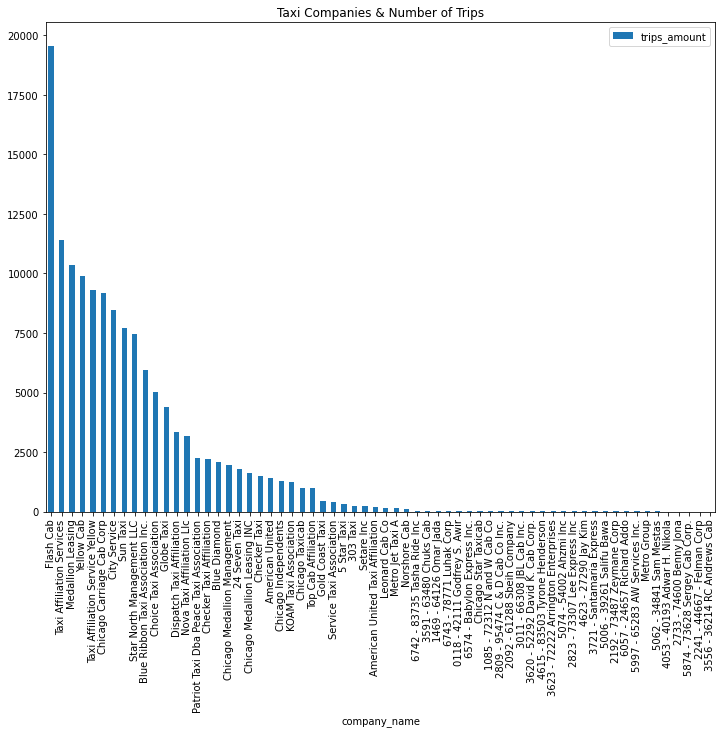

In [18]:
## Taxi companies and number of rides
company.plot(x='company_name', y='trips_amount', figsize=( 12, 9), kind='bar', title='Taxi Companies & Number of Trips');


In [19]:
top_companies= company.nlargest(10,'trips_amount')
print(top_companies)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


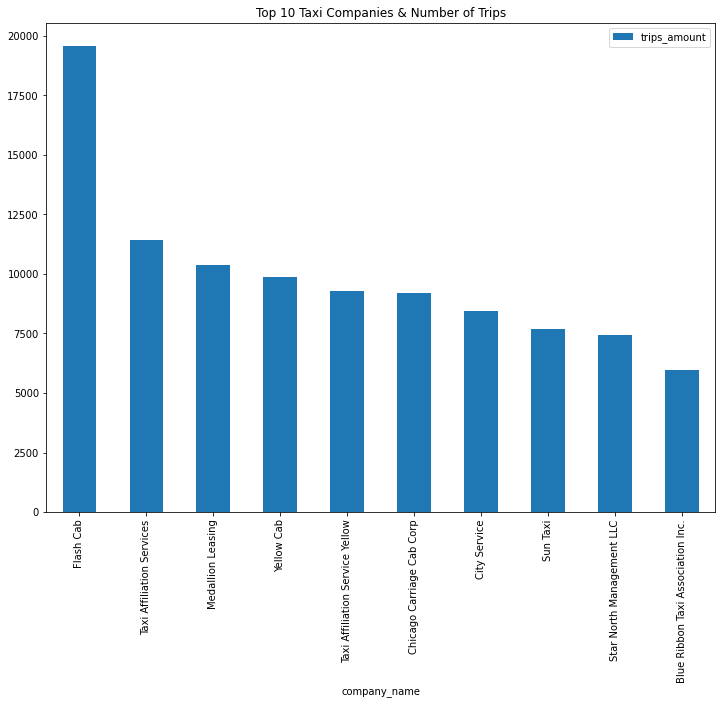

In [20]:
top_companies.plot(x='company_name', y='trips_amount', figsize=( 12, 9), kind='bar', title='Top 10 Taxi Companies & Number of Trips');


The first bar graph represents all trips made for each company. We found a couple of companies with the lowest amount of trips started off with a 4 digit number followed by the company name. I narrowed it down to the top 10 companies and found that Flash cab seems to beat their competitors by at least double the amount of trips.

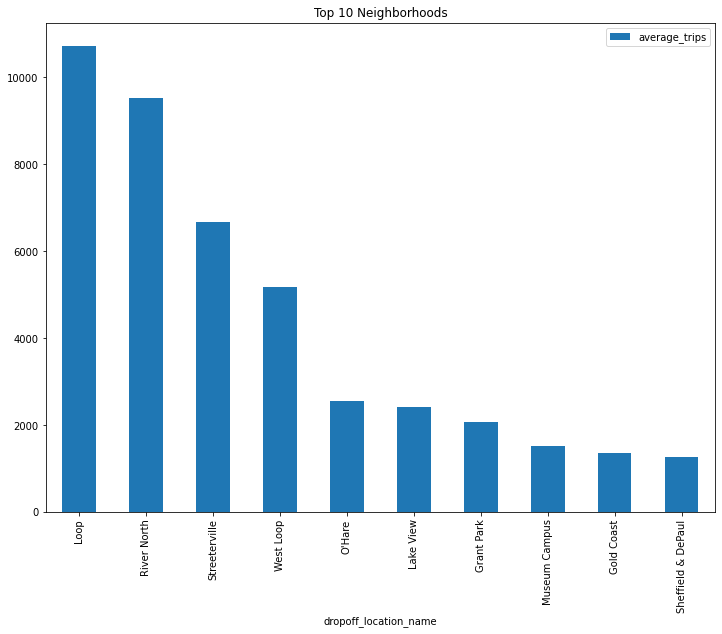

In [21]:
## Top 10 neighborhoods by dropoffs
top_neighborhood.plot(x='dropoff_location_name', y='average_trips', figsize=( 12, 9), kind='bar', title='Top 10 Neighborhoods');


The most popular dropoff location is the Loop neighborhood with River North coming in 2nd.

In [22]:
weather_forecast= airport_trip.pivot_table(index='weather_conditions', values='duration_seconds', aggfunc='count').reset_index()
print(weather_forecast)

  weather_conditions  duration_seconds
0                Bad               180
1               Good               888


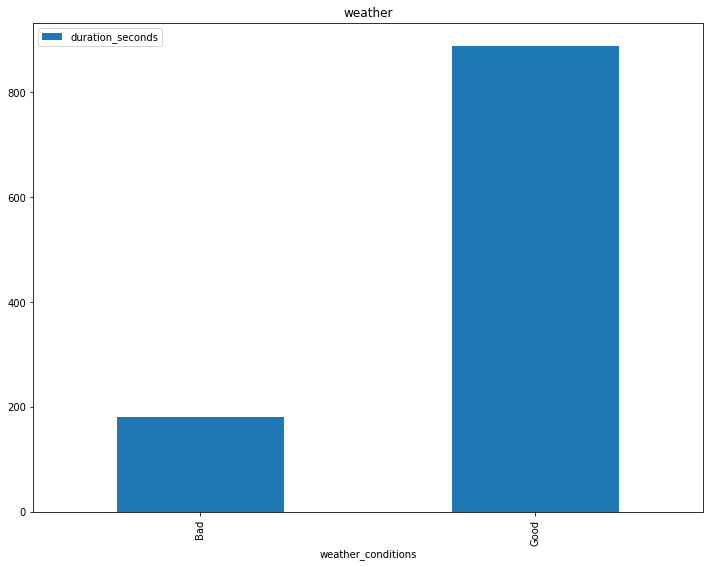

In [23]:
weather_forecast.plot(x='weather_conditions', y='duration_seconds', figsize=( 12, 9), kind='bar', title='weather');


Most cab rides to the aiport are done during good weather, not surprising!

## Testing Hypothesis

H0 = The average durarion of rides from the Loop to O'Hare International Airport does not change on Saturdays.
H1 = The average durarion of rides from the Loop to O'Hare International Airport does changes on rainy Saturdays.

In [24]:
rainy_day = airport_trip.query('weather_conditions =="Bad"')['duration_seconds']
no_rain= airport_trip.query('weather_conditions =="Good"')['duration_seconds']

print('mean bad day:', pd.Series(rainy_day).mean())
print('mean good day:', pd.Series(no_rain).mean())

mean bad day: 2427.2055555555557
mean good day: 1999.6756756756756


In [25]:
alpha= 0.05

results = st.ttest_ind(rainy_day, no_rain)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  6.517970327099473e-12
We reject the null hypothesis


We conclude that the average duration from the Loop to O'Hare International Airport changes depending on the weather.

## Conclusion
 We fisrt started off by studying the database provided. 1.Company Table contained the companies names and the amount of trips made for each company during 11/15/17-11/16/17. It consists of 64 rows and 2 columns. There are no missing values in the data provided.2.The trips table contained data on the dropoff locations and avg number of tips. It consists of 94 rows and 2 columns. This table also does not contain any missing values. Our last table, Airport Trip, contained data on rides from the Loop to O'Hare International Airport, the weather and the duration of the rides. It consist of 1068 rows and 3 columns. There no missing values in this data. We made appropriate changes to two columns in the airport changes to present the data accurately.Our next task was to graph and identify the Top 10 companies & neighborhoods,Flash Cab & Loop came first in both categories. In our observation, We found a couple of companies with the lowest amount of trips started off with a 4 digit number followed by the company name. After performing our hypothesis testing we found that the average duration from the Loop to O'Hare Internation Airport is dependent on the weather. 
 
 There could be many factor as why customers prefer being picked up from either Loop or River North, distance could be one reason or they are both affluent neighborhorhoods. Flash Cab's popularity may be due to its marketing strategy, higher market share or they may offer discount & other perks to their riders.